In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df=pd.read_csv("winequality-red (1).csv")[['quality','alcohol','residual sugar']]
df


,quality,alcohol,residual sugar
0,5,9.4,1.9
1,5,9.8,2.6
2,5,9.8,2.3
3,6,9.8,1.9
4,5,9.4,1.9
...,...,...,...
1594,5,10.5,2.0
1595,6,11.2,2.2
1596,6,11.0,2.3
1597,5,10.2,2.0


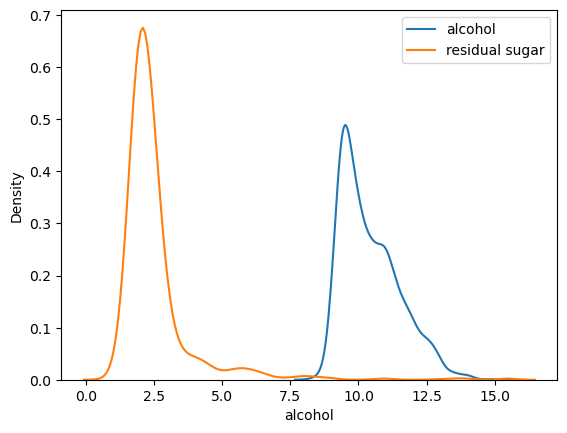

In [63]:
sns.kdeplot(df['alcohol'],label="alcohol")
sns.kdeplot(df['residual sugar'],label="residual sugar")
plt.legend()
plt.show()

<Axes: xlabel='alcohol', ylabel='residual sugar'>

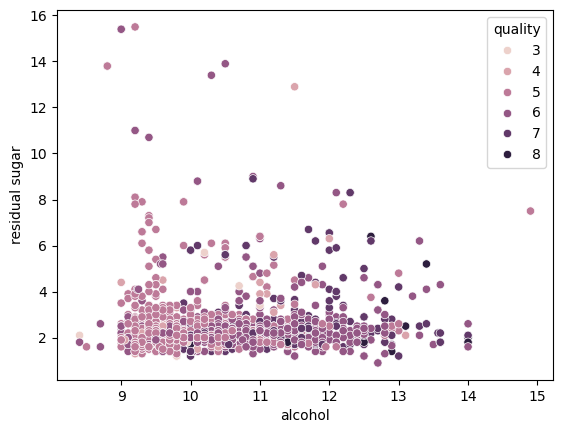

In [57]:
sns.scatterplot(x=df['alcohol'],y=df['residual sugar'],hue=df['quality'])

In [58]:
from sklearn.model_selection import train_test_split

In [65]:
xtrain,xtest,ytrain,ytest=train_test_split(df.drop('quality',axis=1),df['quality'],test_size=0.3,random_state=1)
ytrain=pd.DataFrame(ytrain,columns=['quality'])
ytest=pd.DataFrame(ytest,columns=['quality'])

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
minmax= MinMaxScaler()
minmax.fit(xtrain)
xtrain_scaled=pd.DataFrame(minmax.transform(xtrain),columns=xtrain.columns)
xtest_scaled=pd.DataFrame(minmax.transform(xtest),columns=xtest.columns)
print(xtrain_scaled)

       alcohol  residual sugar
0     0.384615        0.061538
1     0.323077        0.130769
2     0.200000        0.038462
3     0.215385        0.092308
4     0.230769        0.053846
...        ...             ...
1114  0.123077        0.138462
1115  0.169231        0.161538
1116  0.369231        0.353846
1117  0.092308        0.076923
1118  0.630769        0.069231

[1119 rows x 2 columns]


<Axes: xlabel='alcohol', ylabel='residual sugar'>

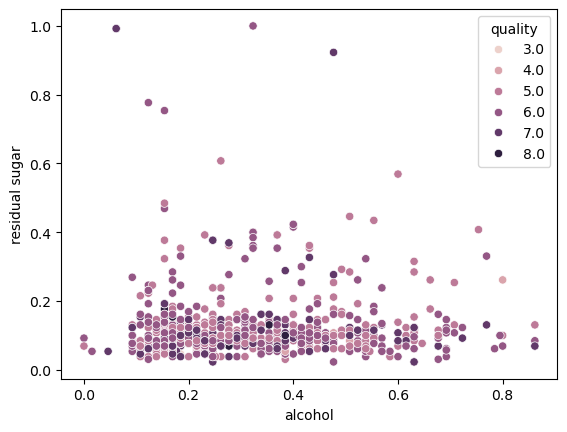

In [62]:
sns.scatterplot(x=xtrain_scaled['alcohol'],y=xtrain_scaled['residual sugar'],hue=ytrain['quality'])

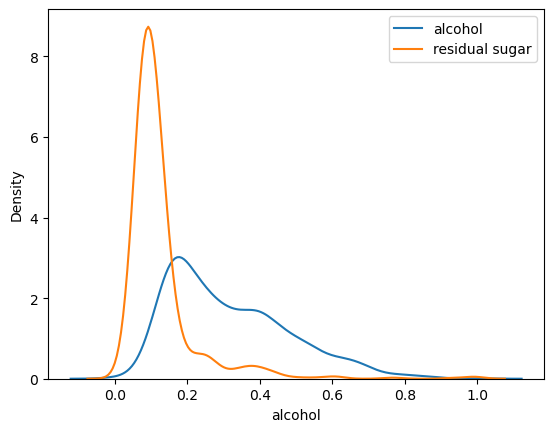

In [64]:
sns.kdeplot(xtrain_scaled['alcohol'],label="alcohol")
sns.kdeplot(xtrain_scaled['residual sugar'],label="residual sugar")
plt.legend()
plt.show()

**Using RoBust Scaler**

In [66]:
from sklearn.preprocessing import RobustScaler

In [67]:
rbust=RobustScaler()
rbust.fit(xtrain)
xtrain_rbst=pd.DataFrame(rbust.transform(xtrain),columns=xtrain.columns)
xtest_rbst=pd.DataFrame(rbust.transform(xtest),columns=xtest.columns)


<Axes: xlabel='alcohol', ylabel='residual sugar'>

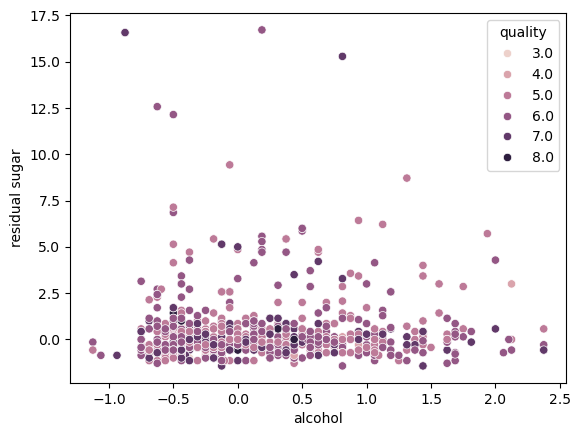

In [68]:
sns.scatterplot(x=xtrain_rbst['alcohol'],y=xtrain_rbst['residual sugar'],hue=ytrain['quality'])

In [ ]:
### we can see in robust scaling after scaling the  values od outlires still big which will good for knn,or distance best algo